In [1]:
import argparse
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import numpy as np
from torch.distributions import Normal

import random

import matplotlib.pyplot as plt
from IPython.display import clear_output
import pickle
import celluloid
import seaborn as sns

import cv2

save = False

In [2]:
dir_path1 = "results/intensity/entklerg_01/"
# Load Pickled Data
file_path1 = dir_path1 + "data_eval_dict.pickle"
with open(file_path1, 'rb') as f: 
    data_dict1 = pickle.load(f, encoding="bytes")
    print(data_dict1.keys())
obj1 = data_dict1['obj_loc']
obj2 = data_dict1['obj2_loc']
traj1 = data_dict1['path']
loss1 = data_dict1['losses']
buffer1 = data_dict1['buffer']
action1 = data_dict1['actions']
env_traj1 = data_dict1['env_path']
env_lim = data_dict1['tray_lim']
klerg_lim = data_dict1['klerg_lim']


# dir_path2 = "results/intensity/rand_01/"
# # Load Pickled Data
# file_path2 = dir_path2 + "data_eval_dict.pickle"
# with open(file_path2, 'rb') as f: 
#     data_dict2 = pickle.load(f, encoding="bytes")
#     print(data_dict2.keys())
# # obj1 = data_dict2['obj_loc']
# # obj2 = data_dict2['obj2_loc']
# traj2 = data_dict2['path']
# loss2 = data_dict2['losses']
# buffer2 = data_dict2['buffer']
# action2 = data_dict2['actions']
# env_traj2 = data_dict2['env_path']
# # env_lim = data_dict2['tray_lim']
# # klerg_lim = data_dict2['klerg_lim']

dict_keys(['path', 'actions', 'buffer', 'env_path', 'obj_loc', 'obj2_loc', 'losses', 'tray_lim', 'klerg_lim'])


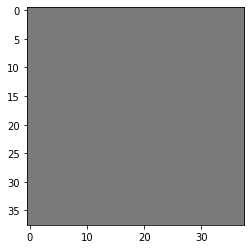

(-0.3, -0.7)

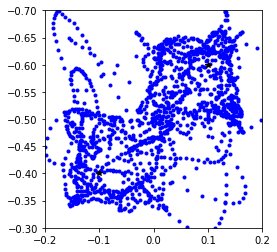

In [4]:
fig, ax = plt.subplots()

img = np.reshape(buffer1[0][1], (38,38))
ax.imshow(img, cmap='gray',vmin=0, vmax=1)
plt.show()

fig = plt.figure()
fig.patch.set_facecolor('white')

env_traj1 = np.array(env_traj1)
plt.plot(env_traj1[:,0], env_traj1[:,2],'b.')
plt.plot(obj1[0], obj1[2],'k*')
plt.plot(obj2[0], obj2[2],'k*')
plt.axis('square')
plt.xlim(env_lim[0])
plt.ylim(env_lim[1])


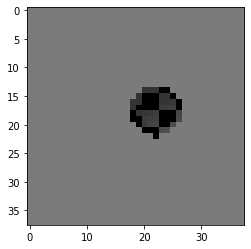

In [5]:
from celluloid import Camera
fig,ax = plt.subplots()

camera = Camera(fig)
for i in range(len(buffer1)):
    cam_data = np.reshape(buffer1[i][1], (38,38))
    ax.imshow(cam_data, cmap="gray",vmin=0, vmax=1)
    camera.snap()

animation = camera.animate()
animation.save('camint_traj_cameraview_test.mp4')


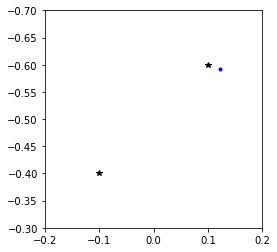

In [31]:
fig = plt.figure()
fig.patch.set_facecolor('white')
camera = Camera(fig)

env_traj1 = np.array(env_traj1)
for i in range(len(buffer1)):
    plt.plot(env_traj1[i,0], env_traj1[i,2],'b.')
    plt.plot(obj1[0], obj1[2],'k*')
    plt.plot(obj2[0], obj2[2],'k*')
    plt.axis('square')
    plt.xlim(env_lim[0])
    plt.ylim(env_lim[1])
    camera.snap()

animation = camera.animate()
animation.save('camint_traj_stateplot.mp4')

In [26]:
len(env_traj1)

1500